# House Data Analysis - Fortaleza/CE Brazil

## 1. Importing packages

In [1]:
import requests
import pandas as pd
import time
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from scipy.stats import norm
import warnings
import math
warnings.filterwarnings('ignore')

## 2. Loading the data from CSV File

### 2.1 Loading the data using pandas and creating a DataFrame

In [2]:
df_data1 = pd.read_csv('./Resources/olx_Fortaleza_220830.csv')
df_data2 = pd.read_csv('./Resources/olx_Great_Fortaleza_220830.csv')
lst_df = [df_data1,df_data2]
df_Properties = pd.concat(lst_df, ignore_index=True, sort=False)


### 2.2 Looking how our dataset looks like 
 

In [3]:
df_Properties.head()

,Category,Type,Cond_Price,IPTU_Price,Area,Bedrooms,Bathrooms,Garage,Property_Detail,Cond_Detail,Price,Zipcode,City,Neighboor,Address,Description
0,Apartamentos,Venda - apartamento padrão,R$ 790,R$ 1.200,110m²,3,4,2,"Mobiliado, Piscina, Ar condicionado, Varanda, ...","Salão de festas, Condomínio fechado, Permitido...",R$ 690.000,60110370,Fortaleza,Meireles,Rua Antônio Augusto - até 909/910,Código do anúncio: LC0013\n\nConheça o Marbell...
1,Apartamentos,Venda - apartamento padrão,R$ 0,R$ 0,54m²,2,2,2,"Churrasqueira, Piscina, Ar condicionado","Piscina, Elevador",R$ 499.000,60812260,Fortaleza,Edson Queiroz,Travessa Contaneide,Código do anúncio: AP0389\n\nEmpreendimento es...
2,Apartamentos,Venda - apartamento padrão,R$ 450,R$ 0,82m²,3,3,2,"Churrasqueira, Área de serviço, Piscina","Piscina, Elevador",R$ 650.000,60810220,Fortaleza,Engenheiro Luciano Cavalcante,Rua Gontran Giffoni,Código do anúncio: AP0521\n\nExcelente apartam...
3,Casas,Venda - casa em rua pública,R$ 0,R$ 0,145m²,3,2,0,NaN,Permitido animais,R$ 275.000,60050040,Fortaleza,Centro,Rua Solon Pinheiro - até 589/590,"Código do anúncio: fc35f6\n\nCasa, excelente p..."
4,Apartamentos,Venda - apartamento padrão,R$ 322,R$ 0,58m²,2,2,1,"Churrasqueira, Piscina",Piscina,R$ 450.000,60824030,Fortaleza,Parque Iracema,Rua Mauro Freire,Código do anúncio: DAVila_1-2318156\n\nCondomí...


In [4]:
df_Properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         9977 non-null   object
 1   Type             9977 non-null   object
 2   Cond_Price       9558 non-null   object
 3   IPTU_Price       9303 non-null   object
 4   Area             9800 non-null   object
 5   Bedrooms         9977 non-null   object
 6   Bathrooms        9954 non-null   object
 7   Garage           9591 non-null   object
 8   Property_Detail  7231 non-null   object
 9   Cond_Detail      6877 non-null   object
 10  Price            9947 non-null   object
 11  Zipcode          9977 non-null   int64 
 12  City             9977 non-null   object
 13  Neighboor        6525 non-null   object
 14  Address          6401 non-null   object
 15  Description      9977 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.2+ MB


## 3. Exploratory Data Analysis

### 3.1 Remove Duplicated Rows

In [5]:
df_Properties2 = df_Properties.drop_duplicates()
print("Duplicated Lines Removed: "+ str(df_Properties.shape[0] - df_Properties2.shape[0]))

Duplicated Lines Removed: 69


In [6]:
lst_cities = df_Properties2.City.value_counts()[df_Properties2.City.value_counts().values > 50].keys()
lst_cities = list(lst_cities)
lst_cities

['Fortaleza',
 'Eusébio',
 'Aquiraz',
 'Caucaia',
 'Maracanaú',
 'Itaitinga',
 'Pacatuba',
 'Maranguape']

In [7]:
df_Properties2 = df_Properties2[df_Properties2['City'].isin(lst_cities)]
df_Properties2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 0 to 9976
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         9813 non-null   object
 1   Type             9813 non-null   object
 2   Cond_Price       9418 non-null   object
 3   IPTU_Price       9162 non-null   object
 4   Area             9643 non-null   object
 5   Bedrooms         9813 non-null   object
 6   Bathrooms        9791 non-null   object
 7   Garage           9439 non-null   object
 8   Property_Detail  7126 non-null   object
 9   Cond_Detail      6784 non-null   object
 10  Price            9784 non-null   object
 11  Zipcode          9813 non-null   int64 
 12  City             9813 non-null   object
 13  Neighboor        6463 non-null   object
 14  Address          6349 non-null   object
 15  Description      9813 non-null   object
dtypes: int64(1), object(15)
memory usage: 1.3+ MB


### 3.2 Check for missing values

<AxesSubplot:>

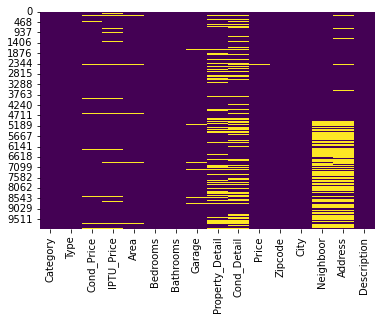

In [8]:
#Let's analyze the distribution of missing values
sns.heatmap(df_Properties2.isnull(),cbar=False,cmap='viridis')

### 3.3 Dealing with missing values

<AxesSubplot:>

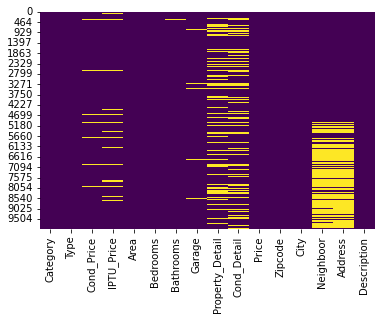

In [9]:
#For a good analysis of the houses I believe some very important information is the Price and the Area
#So let's remove the lines with null information in price and area
df_Properties2 = df_Properties2[~df_Properties2['Price'].isnull()]
df_Properties2 = df_Properties2[~df_Properties2['Area'].isnull()]
sns.heatmap(df_Properties2.isnull(),cbar=False,cmap='viridis')

In [10]:
#Let's analyze the columns IPTU price that is relative to the value of tax over property that need be paid every year to the goverment
df_Properties2['IPTU_Price'].value_counts()

R$ 0        7288
R$ 1         282
R$ 200        76
R$ 150        50
R$ 1.200      47
            ... 
R$ 139         1
R$ 427         1
R$ 5.000       1
R$ 571         1
R$ 2.547       1
Name: IPTU_Price, Length: 509, dtype: int64

In [11]:
#Let's analyze the columns Cond_Price that is relative to the value of monthly payment for the use of the amendments
#In the properties that are located inside home condominium
df_Properties2['Cond_Price'].value_counts()

R$ 0            4799
R$ 500           162
R$ 600           154
R$ 1.000         132
R$ 700           129
                ... 
R$ 1.084.000       1
R$ 1.365           1
R$ 490.000         1
R$ 351             1
R$ 1.452           1
Name: Cond_Price, Length: 717, dtype: int64

In [12]:
#We saw that IPTU_Price and Cond_Price has a lot of zero values, for the IPTU column it is really strange, because every property must pay it
#But for Cond_Price, there is some properties that are not located inside a condominium and do not need pay it
#So let's check how these zero values are distributed
df_Properties2[df_Properties2['Cond_Price'] == 'R$ 0'].groupby('Type')['Price'].count()

Type
Venda - apartamento cobertura           55
Venda - apartamento duplex/triplex       2
Venda - apartamento kitchenette          1
Venda - apartamento padrão            1475
Venda - casa em condominio fechado     711
Venda - casa em rua pública           2533
Venda - casa em vila                     6
Venda - loft/studio                     16
Name: Price, dtype: int64

In [13]:
#After evaluation only 'Type' values 'Venda - casa em rua pública' and 'Venda - casa em vila' could not have the Cond_Price, but we saw too many others also with R$ 0
#So in this case it is better drop Cond_Price and also IPTU_Price for our analysis
#Too many zero values, it is better we drop this column
df_Properties2.drop(['Cond_Price'
                     ,'IPTU_Price'
                     ],axis=1, inplace=True)

In [14]:
df_Properties2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         9631 non-null   object
 1   Type             9631 non-null   object
 2   Area             9631 non-null   object
 3   Bedrooms         9631 non-null   object
 4   Bathrooms        9617 non-null   object
 5   Garage           9295 non-null   object
 6   Property_Detail  7046 non-null   object
 7   Cond_Detail      6716 non-null   object
 8   Price            9631 non-null   object
 9   Zipcode          9631 non-null   int64 
 10  City             9631 non-null   object
 11  Neighboor        6312 non-null   object
 12  Address          6211 non-null   object
 13  Description      9631 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [15]:
#Let's check now about the Address column null values
df_Properties2[df_Properties2['Address'].isnull()]

,Category,Type,Area,Bedrooms,Bathrooms,Garage,Property_Detail,Cond_Detail,Price,Zipcode,City,Neighboor,Address,Description
179,Casas,Venda - casa em rua pública,80m²,2,2,2,"Área de serviço, Quarto de serviço","Segurança 24h, Área murada, Permitido animais",R$ 145.000,60888000,Fortaleza,Pedras,NaN,"CASAS NOVAS PRONTAS PARA MORAR , SAIA JÁ DO AL..."
202,Apartamentos,Venda - apartamento padrão,105m²,3,3,2,"Churrasqueira, Piscina, Academia, Varanda, Áre...","Condomínio fechado, Piscina, Academia, Salão d...",R$ 515.000,60325440,Fortaleza,Monte Castelo,NaN,Código do anúncio: 1IUF242\n\nApartamento com ...
324,Casas,Venda - casa em condominio fechado,115m²,3,4,3,"Churrasqueira, Porteiro 24h, Ar condicionado, ...","Permitido animais, Academia, Condomínio fechad...",R$ 459.000,60832650,Fortaleza,Lagoa Redonda,NaN,Código do anúncio: BABMTK\n\nDuplex no condomí...
416,Apartamentos,Venda - apartamento padrão,110m²,3,3,2,NaN,NaN,R$ 390.000,60170241,Fortaleza,Dionisio Torres,NaN,Código do anúncio: 51a_2-615924\n\nApartamento...
417,Casas,Venda - casa em rua pública,95m²,2,1,NaN,NaN,NaN,R$ 130.000,60822462,Fortaleza,Cidade dos Funcionários,NaN,Código do anúncio: SLLOMA18 (85)... ver número...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Apartamentos,Venda - apartamento padrão,88m²,3,3,1,"Mobiliado, Churrasqueira, Armários na cozinha,...","Academia, Piscina, Salão de festas, Portaria, ...",R$ 590.000,61700000,Aquiraz,NaN,NaN,Código do anúncio: LV5MM4\n\nO apartamento est...
9973,Casas,Venda - casa em condominio fechado,200m²,3,3,2,Churrasqueira,Condomínio fechado,R$ 350.000,61760000,Eusébio,NaN,NaN,Código do anúncio: CA0256\n\nExcelente Casa So...
9974,Casas,Venda - casa em rua pública,616m²,4,5 ou mais,5 ou mais,"Piscina, Ar condicionado, Varanda, Churrasquei...",Piscina,R$ 900.000,61700000,Aquiraz,NaN,NaN,Código do anúncio: 9840... ver número\n\nMarav...
9975,Apartamentos,Venda - apartamento padrão,115m²,3,4,2,"Academia, Churrasqueira, Varanda, Piscina","Permitido animais, Portaria, Elevador, Academi...",R$ 1.600.000,61700000,Aquiraz,NaN,NaN,Código do anúncio: theoneGVTECO\n\nO apartamen...


In [16]:
lst_CEP_null_address = list(df_Properties2[df_Properties2['Address'].isnull()]['Zipcode'].unique())

In [17]:
#Use a API to try get information about the address from the Zipcode
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
lst_CEP = {}
for item in lst_CEP_null_address:
    cep = str(item)
    link = f'https://viacep.com.br/ws/{cep}/json'
    requisicao = requests.get(link,headers=headers) 
    if requisicao.status_code == 200:
        lst_CEP[cep] = requisicao.json()
        time.sleep(2)

In [18]:
df_CEP_data = pd.DataFrame(lst_CEP)
df_CEP_data

,60888000,60325440,60832650,60170241,60822462,60865080,60763820,60861630,60425720,60175005,...,61760001,61615470,61760911,61760990,61760110,61900000,61619070,61601704,61625012,61648100
erro,true,NaN,NaN,NaN,NaN,true,true,true,true,NaN,...,NaN,NaN,true,true,NaN,true,NaN,NaN,NaN,NaN
cep,NaN,60325-440,60832-650,60170-241,60822-462,NaN,NaN,NaN,NaN,60175-005,...,61760-001,61615-470,NaN,NaN,61760-110,NaN,61619-070,61601-704,61625-012,61648-100
logradouro,NaN,Rua Conrado Cabral,Rua Antônio Pompil,Rua Coronel Linhares,Rua Doutor José Furtado,NaN,NaN,NaN,NaN,Rua Joaquim Lima,...,Avenida Nova do Contorno,Rua da Caixa D'Água,NaN,NaN,Rua Mário Perdigão Bastos,NaN,Rua Almirante Saldanha da Gama,Rua 1,Rua Luís da Cunha Lima,Rua Morélia
complemento,NaN,até 409/410,,de 1991/1992 ao fim,lado par,NaN,NaN,NaN,NaN,até 99997/99998,...,lado par,,NaN,NaN,,NaN,,(Cj Curicaca),,
bairro,NaN,Monte Castelo,Lagoa Redonda,Dionisio Torres,Cidade dos Funcionários,NaN,NaN,NaN,NaN,Papicu,...,Centro,Jandaiguaba,NaN,NaN,Centro,NaN,Cumbuco,Curicaca,Camurupim,Parque Guadalajara (Jurema)
localidade,NaN,Fortaleza,Fortaleza,Fortaleza,Fortaleza,NaN,NaN,NaN,NaN,Fortaleza,...,Eusébio,Caucaia,NaN,NaN,Eusébio,NaN,Caucaia,Caucaia,Caucaia,Caucaia
uf,NaN,CE,CE,CE,CE,NaN,NaN,NaN,NaN,CE,...,CE,CE,NaN,NaN,CE,NaN,CE,CE,CE,CE
ibge,NaN,2304400,2304400,2304400,2304400,NaN,NaN,NaN,NaN,2304400,...,2304285,2303709,NaN,NaN,2304285,NaN,2303709,2303709,2303709,2303709
gia,NaN,,,,,NaN,NaN,NaN,NaN,,...,,,NaN,NaN,,NaN,,,,
ddd,NaN,85,85,85,85,NaN,NaN,NaN,NaN,85,...,85,85,NaN,NaN,85,NaN,85,85,85,85


In [19]:
#Let's invert this dataframe
df_CEP_data = df_CEP_data.T
df_CEP_data

,erro,cep,logradouro,complemento,bairro,localidade,uf,ibge,gia,ddd,siafi
60888000,true,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60325440,NaN,60325-440,Rua Conrado Cabral,até 409/410,Monte Castelo,Fortaleza,CE,2304400,,85,1389
60832650,NaN,60832-650,Rua Antônio Pompil,,Lagoa Redonda,Fortaleza,CE,2304400,,85,1389
60170241,NaN,60170-241,Rua Coronel Linhares,de 1991/1992 ao fim,Dionisio Torres,Fortaleza,CE,2304400,,85,1389
60822462,NaN,60822-462,Rua Doutor José Furtado,lado par,Cidade dos Funcionários,Fortaleza,CE,2304400,,85,1389
...,...,...,...,...,...,...,...,...,...,...,...
61900000,true,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61619070,NaN,61619-070,Rua Almirante Saldanha da Gama,,Cumbuco,Caucaia,CE,2303709,,85,1373
61601704,NaN,61601-704,Rua 1,(Cj Curicaca),Curicaca,Caucaia,CE,2303709,,85,1373
61625012,NaN,61625-012,Rua Luís da Cunha Lima,,Camurupim,Caucaia,CE,2303709,,85,1373


In [20]:
df_CEP_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 60888000 to 61648100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   erro         31 non-null     object
 1   cep          42 non-null     object
 2   logradouro   42 non-null     object
 3   complemento  42 non-null     object
 4   bairro       42 non-null     object
 5   localidade   42 non-null     object
 6   uf           42 non-null     object
 7   ibge         42 non-null     object
 8   gia          42 non-null     object
 9   ddd          42 non-null     object
 10  siafi        42 non-null     object
dtypes: object(11)
memory usage: 8.9+ KB


In [21]:
df_CEP_data.bairro.value_counts()

Centro                           6
                                 5
Dionisio Torres                  2
Cumbuco                          2
Engenheiro Luciano Cavalcante    2
Mucuripe                         2
Gereraú                          1
Icaraí                           1
Justiniano Serpa                 1
Monte Castelo                    1
Porto das Dunas                  1
Guaribas                         1
Jereissati I                     1
Jandaiguaba                      1
Curicaca                         1
Camurupim                        1
Novo Pabussu                     1
Mondubim                         1
Meireles                         1
Lagoa Redonda                    1
Autran Nunes                     1
Sapiranga-Coité                  1
Aldeota                          1
Jóquei Clube                     1
Parque Dois Irmãos               1
Guararapes                       1
Papicu                           1
Cidade dos Funcionários          1
Parque Guadalajara (

In [22]:
df_CEP_data[df_CEP_data['bairro']=='']

,erro,cep,logradouro,complemento,bairro,localidade,uf,ibge,gia,ddd,siafi
61700000,NaN,61700-000,,,,Aquiraz,CE,2301000,,85,1319
61880000,NaN,61880-000,,,,Itaitinga,CE,2306256,,85,0991
61700992,NaN,61700-992,Avenida Noé Leite de Freitas,s/n,,Aquiraz,CE,2301000,,85,1319
61700990,NaN,61700-990,Rua Damião Tavares de Souza,s/n,,Aquiraz,CE,2301000,,85,1319
61700996,NaN,61700-996,Rod Ce 040 Escola Ótavio Correia Lima,,,Aquiraz,CE,2301000,,85,1319


In [23]:
#Now let's add the 'logradouro' to the 'address' of the ones that has valids Zipcodes and has returned some value from the API
#Let's create a function that we can apply to each row in the dataset
def update_address_by_zipcode(row,cep_dataframe):
    if pd.isnull(row['Address']):
        if str(row['Zipcode']) in list(cep_dataframe.index):
            if cep_dataframe.loc[str(row['Zipcode']),'logradouro'] != '':
                row['Address'] = cep_dataframe.loc[str(row['Zipcode']),'logradouro']
    if pd.isnull(row['Neighboor']):
        if str(row['Zipcode']) in list(cep_dataframe.index):
            if cep_dataframe.loc[str(row['Zipcode']),'bairro'] != '':
                row['Neighboor'] = cep_dataframe.loc[str(row['Zipcode']),'bairro']
    return row

In [24]:
df_Properties3 = df_Properties2.apply(lambda row: update_address_by_zipcode(row, df_CEP_data[df_CEP_data['erro'].isnull()]), axis=1)
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         9631 non-null   object
 1   Type             9631 non-null   object
 2   Area             9631 non-null   object
 3   Bedrooms         9631 non-null   object
 4   Bathrooms        9617 non-null   object
 5   Garage           9295 non-null   object
 6   Property_Detail  7046 non-null   object
 7   Cond_Detail      6716 non-null   object
 8   Price            9631 non-null   object
 9   Zipcode          9631 non-null   int64 
 10  City             9631 non-null   object
 11  Neighboor        6331 non-null   object
 12  Address          6253 non-null   object
 13  Description      9631 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [25]:
df_Properties3[df_Properties3['Neighboor'].isnull()]['City'].value_counts()

Eusébio      2080
Aquiraz       961
Itaitinga     255
Pacatuba        3
Maracanaú       1
Name: City, dtype: int64

In [26]:
df_Properties3[df_Properties3['Neighboor'].isnull()]

,Category,Type,Area,Bedrooms,Bathrooms,Garage,Property_Detail,Cond_Detail,Price,Zipcode,City,Neighboor,Address,Description
4983,Casas,Venda - casa em condominio fechado,150m²,4,4,2,"Churrasqueira, Piscina, Área de serviço, Ar co...","Piscina, Condomínio fechado",R$ 569.000,61760000,Eusébio,NaN,NaN,Código do anúncio: CA0565\n\nRef.:5435 - Um lu...
4984,Casas,Venda - casa em condominio fechado,230m²,4,5 ou mais,4,"Área de serviço, Varanda, Churrasqueira","Condomínio fechado, Segurança 24h, Área murada...",R$ 1.350.000,61760000,Eusébio,NaN,NaN,UMA CIDADE PENSADA PARA VOCÊ\n\nOcupando mais ...
4985,Casas,Venda - casa em condominio fechado,210m²,4,4,3,"Porteiro 24h, Varanda, Ar condicionado","Permitido animais, Portão eletrônico",R$ 995.000,61760000,Eusébio,NaN,NaN,Código do anúncio: EUSEBIO1\n\nA casa de condo...
4986,Casas,Venda - casa em condominio fechado,335m²,4,4,4,"Piscina, Área de serviço",Piscina,R$ 4.000.000,61760000,Eusébio,NaN,NaN,Código do anúncio: 85\n\nALPHAVILLE - FORTALEZ...
4988,Casas,Venda - casa em condominio fechado,362m²,3,4,4,NaN,NaN,R$ 2.200.000,61760000,Eusébio,NaN,NaN,Código do anúncio: 15BDMS7\n\nLinda casa em co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Apartamentos,Venda - apartamento padrão,88m²,3,3,1,"Mobiliado, Churrasqueira, Armários na cozinha,...","Academia, Piscina, Salão de festas, Portaria, ...",R$ 590.000,61700000,Aquiraz,NaN,NaN,Código do anúncio: LV5MM4\n\nO apartamento est...
9973,Casas,Venda - casa em condominio fechado,200m²,3,3,2,Churrasqueira,Condomínio fechado,R$ 350.000,61760000,Eusébio,NaN,NaN,Código do anúncio: CA0256\n\nExcelente Casa So...
9974,Casas,Venda - casa em rua pública,616m²,4,5 ou mais,5 ou mais,"Piscina, Ar condicionado, Varanda, Churrasquei...",Piscina,R$ 900.000,61700000,Aquiraz,NaN,NaN,Código do anúncio: 9840... ver número\n\nMarav...
9975,Apartamentos,Venda - apartamento padrão,115m²,3,4,2,"Academia, Churrasqueira, Varanda, Piscina","Permitido animais, Portaria, Elevador, Academi...",R$ 1.600.000,61700000,Aquiraz,NaN,NaN,Código do anúncio: theoneGVTECO\n\nO apartamen...


In [27]:
#For these cities since they are small cities, for the neighboors missing we will add the same name of the city for the neighboor
def city_to_null_neighboor(row):
    if pd.isnull(row['Neighboor']):
        row['Neighboor'] = row['City']
    return row

In [28]:
df_Properties3 = df_Properties3.apply(city_to_null_neighboor,axis=1)
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         9631 non-null   object
 1   Type             9631 non-null   object
 2   Area             9631 non-null   object
 3   Bedrooms         9631 non-null   object
 4   Bathrooms        9617 non-null   object
 5   Garage           9295 non-null   object
 6   Property_Detail  7046 non-null   object
 7   Cond_Detail      6716 non-null   object
 8   Price            9631 non-null   object
 9   Zipcode          9631 non-null   int64 
 10  City             9631 non-null   object
 11  Neighboor        9631 non-null   object
 12  Address          6253 non-null   object
 13  Description      9631 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [29]:
#Now we only have 4 columns with missing values, for the column Bathroom, let's have a looks in the properties that is missing this information,
#It would be common to have at least 1 bathroom in the property.
df_Properties3[df_Properties3['Bathrooms'].isnull()]

,Category,Type,Area,Bedrooms,Bathrooms,Garage,Property_Detail,Cond_Detail,Price,Zipcode,City,Neighboor,Address,Description
94,Apartamentos,Venda - apartamento padrão,360m²,0,NaN,NaN,NaN,NaN,R$ 26.000,60760325,Fortaleza,Planalto Ayrton Senna,Rua Silvia Santos,"Vendo lote na praia do Balbino, excelente prai..."
258,Apartamentos,Venda - apartamento padrão,248m²,4,NaN,5 ou mais,Varanda,NaN,R$ 2.359.000,60810145,Fortaleza,Guararapes,Avenida Chanceler Edson Queiroz,Apartamento no Melhor condomínio do bairro Gua...
348,Casas,Venda - casa em rua pública,210m²,4,NaN,3,"Área de serviço, Armários na cozinha, Armários...",NaN,R$ 450.000,60320330,Fortaleza,São Gerardo,Rua Carmem Cenira,Vendo uma casa localizada na Rua Carmem Cenira...
1105,Apartamentos,Venda - apartamento padrão,122m²,3,NaN,2,"Armários embutidos, Armários na cozinha, Ar co...","Condomínio fechado, Elevador, Segurança 24h, P...",R$ 249.000,60160230,Fortaleza,Meireles,Avenida Dom Luís - lado ímpar,Rua Mestre Jerônimo 233\nMucuripe\n\n 5 minuto...
1314,Casas,Venda - casa em rua pública,23m²,1,NaN,0,Quarto de serviço,NaN,R$ 220.000,60863750,Fortaleza,Barroso,Rua 16 (Cj João Paulo II),Vendo uma vila de casa por 220.000 interessado...
1776,Apartamentos,Venda - apartamento padrão,164m²,3,NaN,2,"Área de serviço, Armários na cozinha, Varanda,...","Elevador, Portaria, Permitido animais, Salão d...",R$ 925.000,60170320,Fortaleza,Meireles,Rua Coronel Jucá - até 429/430,"03 suítes, cozinha com armários, sala grande, ..."
3150,Casas,Venda - casa em condominio fechado,353m²,4,NaN,4,Área de serviço,"Condomínio fechado, Segurança 24h, Área murada...",R$ 2.250.000,60055270,Fortaleza,José Bonifácio,Vila São Jorge,Vendo casa em condomínio fechado ( AZUR) no Eu...
4541,Apartamentos,Venda - apartamento padrão,79m²,3,NaN,2,"Área de serviço, Armários embutidos, Armários ...","Condomínio fechado, Elevador, Segurança 24h, P...",R$ 560.000,60170265,Fortaleza,Meireles,Avenida Senador Virgílio Távora - até 889 - la...,"REF: 687149\n\nExcelente apartamento de 79,37 ..."
4781,Apartamentos,Venda - apartamento padrão,63m²,2,NaN,1,"Área de serviço, Armários embutidos, Armários ...","Condomínio fechado, Elevador, Segurança 24h, P...",R$ 699.000,60192340,Fortaleza,Cocó,Rua Doutor Batista de Oliveira - de 731/732 ao...,Edifício de alto padrão. \n\nEntre em contato ...
5137,Casas,Venda - casa em rua pública,230m²,4,NaN,NaN,"Área de serviço, Armários embutidos, Churrasqu...","Condomínio fechado, Segurança 24h, Área murada...",R$ 697.535,61765911,Eusébio,Centro,Avenida Atlântica,CASA com 4 dormitórios\n\nSOMOS UMA CONSULTORI...


In [30]:
#Looks like it is reasonable we set the value 1 for bathroom for these properties
df_Properties3['Bathrooms'] = df_Properties3['Bathrooms'].apply(lambda x: x if pd.notnull(x) else '1')
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         9631 non-null   object
 1   Type             9631 non-null   object
 2   Area             9631 non-null   object
 3   Bedrooms         9631 non-null   object
 4   Bathrooms        9631 non-null   object
 5   Garage           9295 non-null   object
 6   Property_Detail  7046 non-null   object
 7   Cond_Detail      6716 non-null   object
 8   Price            9631 non-null   object
 9   Zipcode          9631 non-null   int64 
 10  City             9631 non-null   object
 11  Neighboor        9631 non-null   object
 12  Address          6253 non-null   object
 13  Description      9631 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [31]:
#For garage let's apply zero
df_Properties3['Garage'] = df_Properties3['Garage'].apply(lambda x: x if pd.notnull(x) else '0')
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         9631 non-null   object
 1   Type             9631 non-null   object
 2   Area             9631 non-null   object
 3   Bedrooms         9631 non-null   object
 4   Bathrooms        9631 non-null   object
 5   Garage           9631 non-null   object
 6   Property_Detail  7046 non-null   object
 7   Cond_Detail      6716 non-null   object
 8   Price            9631 non-null   object
 9   Zipcode          9631 non-null   int64 
 10  City             9631 non-null   object
 11  Neighboor        9631 non-null   object
 12  Address          6253 non-null   object
 13  Description      9631 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [32]:
#Now only the columns Property_Detail and Cond_Detail has missing values, these columns are about amendments in the property and in the condominium, I took a look in the website
#to check the options available, the options available are shown in the picture below. For these columns we will create a columns for each item and encode the values of these columns
#for the properties with null values we will consider there is no amendments for this case study.

![OLX_details.png](./Resources/OLX_datails.png)

In [33]:
#To ensure we have all the values we can iterate over the dataframe and evaluate the values
set_prop_details = set()
set_cond_details = set()
for row in df_Properties3.itertuples():
    if pd.notnull(row.Property_Detail):
        lst_details = row.Property_Detail.split(',')
        for item in lst_details:
            item = item.strip()
            set_prop_details.add(item)
    if pd.notnull(row.Cond_Detail):
        lst_details = row.Cond_Detail.split(',')
        for item in lst_details:
            item = item.strip()
            set_cond_details.add(item)
print(set_prop_details)
print(set_cond_details)

{'Mobiliado', '10', 'Academia', 'Ar condicionado', 'Churrasqueira', 'Área de serviço', 'Armários na cozinha', 'Salão de festas', 'Armários embutidos', 'Porteiro 24h', 'Varanda', 'Quarto de serviço', 'Piscina'}
{'Academia', 'Área murada', 'Salão de festas', 'Segurança 24h', 'Elevador', 'Permitido animais', 'Portaria', 'Portão eletrônico', 'Condomínio fechado', 'Piscina'}


In [34]:
#Let's create a function to encode the columns
def encode_details(row):
    row['c_Elevador'] = 0
    row['c_Portaria'] = 0
    row['c_Piscina'] = 0
    row['c_Portao_eletronico'] = 0 
    row['c_Condominio_fechado'] = 0  
    row['c_Segurança_24h'] = 0 
    row['c_Permitido_animais'] = 0  
    row['c_Area_murada'] = 0 
    row['c_Academia'] = 0  
    row['c_Salao_de_festas'] = 0 
    if pd.notnull(row['Cond_Detail']):
        lst_cond_details = list(row['Cond_Detail'].split(','))
        for item in lst_cond_details:
            if item.strip() == 'Elevador':  
                row['c_Elevador'] = 1
            if item.strip() == 'Portaria':
                row['c_Portaria'] = 1
            if item.strip() == 'Piscina':
                row['c_Piscina'] = 1
            if item.strip() == 'Portão eletrônico':
                row['c_Portao_eletronico'] = 1 
            if item.strip() == 'Condomínio fechado':
                row['c_Condominio_fechado'] = 1
            if item.strip() == 'Segurança 24h':
                row['c_Segurança_24h'] = 1
            if item.strip() == 'Permitido animais':
                row['c_Permitido_animais'] = 1
            if item.strip() == 'Área murada':
                row['c_Area_murada'] = 1
            if item.strip() == 'Academia':
                row['c_Academia'] = 1
            if item.strip() == 'Salão de festas':
                row['c_Salao_de_festas'] = 1 
    row['p_Porteiro_24h'] = 0
    row['p_Churrasqueira'] = 0
    row['p_Piscina'] = 0
    row['p_Armarios_embutidos'] = 0
    row['p_Ar_condicionado'] = 0
    row['p_Quarto_de_servico'] = 0
    row['p_Varanda'] = 0
    row['p_Armarios_na_cozinha'] = 0
    row['p_Academia'] = 0
    row['p_Area_de_servico'] = 0
    row['p_Mobiliado'] = 0
    row['p_Salao_de_festas'] = 0
    if pd.notnull(row['Property_Detail']):
        lst_prop_details = list(row['Property_Detail'].split(','))
        for item in lst_prop_details:
            if item.strip() == 'Porteiro 24h':
                row['p_Porteiro_24h'] = 1
            if item.strip() == 'Churrasqueira':                
                row['p_Churrasqueira'] = 1
            if item.strip() == 'Piscina':                
                row['p_Piscina'] = 1
            if item.strip() == 'Armários embutidos':                
                row['p_Armarios_embutidos'] = 1
            if item.strip() == 'Ar condicionado':                
                row['p_Ar_condicionado'] = 1
            if item.strip() == 'Quarto de serviço':                
                row['p_Quarto_de_servico'] = 1
            if item.strip() == 'Varanda':                
                row['p_Varanda'] = 1
            if item.strip() == 'Armários na cozinha':                
                row['p_Armarios_na_cozinha'] = 1
            if item.strip() == 'Academia':                
                row['p_Academia'] = 1
            if item.strip() == 'Área de serviço':                
                row['p_Area_de_servico'] = 1
            if item.strip() == 'Mobiliado':                
                row['p_Mobiliado'] = 1
            if item.strip() == 'Salão de festas':                
                row['p_Salao_de_festas'] = 1
    return row

In [35]:
df_Properties3 = df_Properties3.apply(encode_details,axis=1)
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Category               9631 non-null   object
 1   Type                   9631 non-null   object
 2   Area                   9631 non-null   object
 3   Bedrooms               9631 non-null   object
 4   Bathrooms              9631 non-null   object
 5   Garage                 9631 non-null   object
 6   Property_Detail        7046 non-null   object
 7   Cond_Detail            6716 non-null   object
 8   Price                  9631 non-null   object
 9   Zipcode                9631 non-null   int64 
 10  City                   9631 non-null   object
 11  Neighboor              9631 non-null   object
 12  Address                6253 non-null   object
 13  Description            9631 non-null   object
 14  c_Elevador             9631 non-null   int64 
 15  c_Portaria           

In [36]:
#Now we can drop the columns Cond_Detail and Property_Detail
df_Properties3.drop(['Cond_Detail'
                     ,'Property_Detail'
                     ],axis=1, inplace=True)
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Category               9631 non-null   object
 1   Type                   9631 non-null   object
 2   Area                   9631 non-null   object
 3   Bedrooms               9631 non-null   object
 4   Bathrooms              9631 non-null   object
 5   Garage                 9631 non-null   object
 6   Price                  9631 non-null   object
 7   Zipcode                9631 non-null   int64 
 8   City                   9631 non-null   object
 9   Neighboor              9631 non-null   object
 10  Address                6253 non-null   object
 11  Description            9631 non-null   object
 12  c_Elevador             9631 non-null   int64 
 13  c_Portaria             9631 non-null   int64 
 14  c_Piscina              9631 non-null   int64 
 15  c_Portao_eletronico  

In [37]:
#The address is to specific and has many different values, it will also not be very useful for our analysis
df_Properties3[df_Properties3['Address'].isnull()]['City'].value_counts()

Eusébio      2131
Aquiraz       962
Itaitinga     257
Fortaleza      23
Pacatuba        3
Maracanaú       2
Name: City, dtype: int64

In [38]:
#Since we alreday have the region by neighboor let's drop the column adress
df_Properties3.drop(['Address'],axis=1, inplace=True)

<AxesSubplot:>

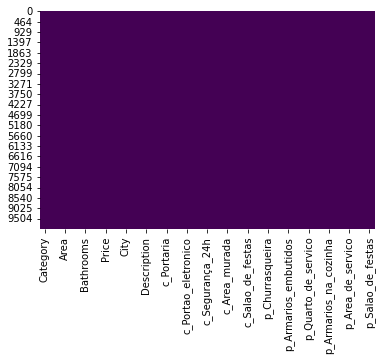

In [39]:
#Now we have all the columns with the same quantity of non-null values
sns.heatmap(df_Properties3.isnull(),cbar=False,cmap='viridis')

In [40]:
#Now let's transform the Price in a numeric column
df_Properties3['Price_Value'] = pd.to_numeric(df_Properties3["Price"].str.split(expand = True)[1].str.replace('.',''))
df_Properties3.head(10)

,Category,Type,Area,Bedrooms,Bathrooms,Garage,Price,Zipcode,City,Neighboor,...,p_Armarios_embutidos,p_Ar_condicionado,p_Quarto_de_servico,p_Varanda,p_Armarios_na_cozinha,p_Academia,p_Area_de_servico,p_Mobiliado,p_Salao_de_festas,Price_Value
0,Apartamentos,Venda - apartamento padrão,110m²,3,4,2,R$ 690.000,60110370,Fortaleza,Meireles,...,0,1,0,1,0,1,0,1,0,690000
1,Apartamentos,Venda - apartamento padrão,54m²,2,2,2,R$ 499.000,60812260,Fortaleza,Edson Queiroz,...,0,1,0,0,0,0,0,0,0,499000
2,Apartamentos,Venda - apartamento padrão,82m²,3,3,2,R$ 650.000,60810220,Fortaleza,Engenheiro Luciano Cavalcante,...,0,0,0,0,0,0,1,0,0,650000
3,Casas,Venda - casa em rua pública,145m²,3,2,0,R$ 275.000,60050040,Fortaleza,Centro,...,0,0,0,0,0,0,0,0,0,275000
4,Apartamentos,Venda - apartamento padrão,58m²,2,2,1,R$ 450.000,60824030,Fortaleza,Parque Iracema,...,0,0,0,0,0,0,0,0,0,450000
5,Apartamentos,Venda - apartamento padrão,56m²,2,2,1,R$ 570.000,60115080,Fortaleza,Meireles,...,0,0,0,0,0,0,0,0,0,570000
6,Apartamentos,Venda - apartamento padrão,53m²,2,2,1,R$ 449.000,60822365,Fortaleza,Cambeba,...,0,0,0,0,0,1,0,0,0,449000
7,Apartamentos,Venda - apartamento padrão,100m²,3,4,2,R$ 950.000,60192035,Fortaleza,Cocó,...,0,0,0,0,0,0,0,0,0,950000
8,Apartamentos,Venda - apartamento padrão,152m²,3,4,3,R$ 1.341.236,60811310,Fortaleza,Engenheiro Luciano Cavalcante,...,0,0,0,0,0,1,1,0,0,1341236
9,Casas,Venda - casa em condominio fechado,98m²,3,2,2,R$ 580.000,60833365,Fortaleza,Sapiranga-Coité,...,0,0,0,0,0,0,1,0,0,580000


In [41]:
#Now let's transform the Area in a numeric column
df_Properties3["Area_value"] = pd.to_numeric(df_Properties3["Area"].str.replace('m²',''))
df_Properties3.head(10)

,Category,Type,Area,Bedrooms,Bathrooms,Garage,Price,Zipcode,City,Neighboor,...,p_Ar_condicionado,p_Quarto_de_servico,p_Varanda,p_Armarios_na_cozinha,p_Academia,p_Area_de_servico,p_Mobiliado,p_Salao_de_festas,Price_Value,Area_value
0,Apartamentos,Venda - apartamento padrão,110m²,3,4,2,R$ 690.000,60110370,Fortaleza,Meireles,...,1,0,1,0,1,0,1,0,690000,110
1,Apartamentos,Venda - apartamento padrão,54m²,2,2,2,R$ 499.000,60812260,Fortaleza,Edson Queiroz,...,1,0,0,0,0,0,0,0,499000,54
2,Apartamentos,Venda - apartamento padrão,82m²,3,3,2,R$ 650.000,60810220,Fortaleza,Engenheiro Luciano Cavalcante,...,0,0,0,0,0,1,0,0,650000,82
3,Casas,Venda - casa em rua pública,145m²,3,2,0,R$ 275.000,60050040,Fortaleza,Centro,...,0,0,0,0,0,0,0,0,275000,145
4,Apartamentos,Venda - apartamento padrão,58m²,2,2,1,R$ 450.000,60824030,Fortaleza,Parque Iracema,...,0,0,0,0,0,0,0,0,450000,58
5,Apartamentos,Venda - apartamento padrão,56m²,2,2,1,R$ 570.000,60115080,Fortaleza,Meireles,...,0,0,0,0,0,0,0,0,570000,56
6,Apartamentos,Venda - apartamento padrão,53m²,2,2,1,R$ 449.000,60822365,Fortaleza,Cambeba,...,0,0,0,0,1,0,0,0,449000,53
7,Apartamentos,Venda - apartamento padrão,100m²,3,4,2,R$ 950.000,60192035,Fortaleza,Cocó,...,0,0,0,0,0,0,0,0,950000,100
8,Apartamentos,Venda - apartamento padrão,152m²,3,4,3,R$ 1.341.236,60811310,Fortaleza,Engenheiro Luciano Cavalcante,...,0,0,0,0,1,1,0,0,1341236,152
9,Casas,Venda - casa em condominio fechado,98m²,3,2,2,R$ 580.000,60833365,Fortaleza,Sapiranga-Coité,...,0,0,0,0,0,1,0,0,580000,98


In [42]:
df_Properties3["Bathrooms"].value_counts()

2            3080
3            2106
5 ou mais    1702
4            1700
1            1039
0               4
Name: Bathrooms, dtype: int64

In [43]:
#Looking to the columns Bathrooms and Garage we noted they have the same format as the Bedroom column
#So we are creating new columns with numeric values
df_Properties3['Bedrooms_qty'] = pd.to_numeric(df_Properties3["Bedrooms"].str.replace(' ou mais',''))
df_Properties3['Bathrooms_qty'] = pd.to_numeric(df_Properties3["Bathrooms"].str.replace(' ou mais',''))
df_Properties3['Garage_qty'] = pd.to_numeric(df_Properties3["Garage"].str.replace(' ou mais',''))
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Category               9631 non-null   object
 1   Type                   9631 non-null   object
 2   Area                   9631 non-null   object
 3   Bedrooms               9631 non-null   object
 4   Bathrooms              9631 non-null   object
 5   Garage                 9631 non-null   object
 6   Price                  9631 non-null   object
 7   Zipcode                9631 non-null   int64 
 8   City                   9631 non-null   object
 9   Neighboor              9631 non-null   object
 10  Description            9631 non-null   object
 11  c_Elevador             9631 non-null   int64 
 12  c_Portaria             9631 non-null   int64 
 13  c_Piscina              9631 non-null   int64 
 14  c_Portao_eletronico    9631 non-null   int64 
 15  c_Condominio_fechado 

In [44]:
#Now we can drop the columns that we transformed in numeric columns
df_Properties3.drop(['Price'
                     ,'Area'
                     ,'Bedrooms'
                     ,'Bathrooms'
                     ,'Garage'
                     ],axis=1, inplace=True)

In [45]:
df_Properties3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9976
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Category               9631 non-null   object
 1   Type                   9631 non-null   object
 2   Zipcode                9631 non-null   int64 
 3   City                   9631 non-null   object
 4   Neighboor              9631 non-null   object
 5   Description            9631 non-null   object
 6   c_Elevador             9631 non-null   int64 
 7   c_Portaria             9631 non-null   int64 
 8   c_Piscina              9631 non-null   int64 
 9   c_Portao_eletronico    9631 non-null   int64 
 10  c_Condominio_fechado   9631 non-null   int64 
 11  c_Segurança_24h        9631 non-null   int64 
 12  c_Permitido_animais    9631 non-null   int64 
 13  c_Area_murada          9631 non-null   int64 
 14  c_Academia             9631 non-null   int64 
 15  c_Salao_de_festas    

In [46]:
df_Properties3.describe()

,Zipcode,c_Elevador,c_Portaria,c_Piscina,c_Portao_eletronico,c_Condominio_fechado,c_Segurança_24h,c_Permitido_animais,c_Area_murada,c_Academia,...,p_Armarios_na_cozinha,p_Academia,p_Area_de_servico,p_Mobiliado,p_Salao_de_festas,Price_Value,Area_value,Bedrooms_qty,Bathrooms_qty,Garage_qty
count,9.631000e+03,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,9631.000000,...,9631.000000,9631.000000,9631.00000,9631.000000,9631.000000,9.631000e+03,9631.000000,9631.000000,9631.000000,9631.000000
mean,6.108135e+07,0.263628,0.170699,0.481051,0.101236,0.434950,0.063649,0.332676,0.025543,0.251064,...,0.077147,0.168622,0.35988,0.149933,0.003946,8.488322e+05,255.394559,3.034991,2.993147,2.278268
std,7.009935e+05,0.440623,0.376265,0.499667,0.301656,0.495776,0.244139,0.471196,0.157774,0.433648,...,0.266838,0.374437,0.47999,0.357024,0.062693,2.374911e+06,3989.258068,0.863546,1.280071,1.258089
min,6.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,3.500000e+01,0.000000,0.000000,0.000000,0.000000
25%,6.019222e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.576325e+05,75.000000,2.000000,2.000000,1.000000
50%,6.087556e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,4.850000e+05,108.000000,3.000000,3.000000,2.000000
75%,6.176000e+07,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,8.998995e+05,176.000000,4.000000,4.000000,3.000000
max,6.194922e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.450000e+08,230040.000000,5.000000,5.000000,5.000000


In [47]:
numeric_columns = []
for item in df_Properties3.columns:
    if df_Properties3[item].dtype == 'int64':
        numeric_columns.append(item)
print(numeric_columns)

['Zipcode', 'c_Elevador', 'c_Portaria', 'c_Piscina', 'c_Portao_eletronico', 'c_Condominio_fechado', 'c_Segurança_24h', 'c_Permitido_animais', 'c_Area_murada', 'c_Academia', 'c_Salao_de_festas', 'p_Porteiro_24h', 'p_Churrasqueira', 'p_Piscina', 'p_Armarios_embutidos', 'p_Ar_condicionado', 'p_Quarto_de_servico', 'p_Varanda', 'p_Armarios_na_cozinha', 'p_Academia', 'p_Area_de_servico', 'p_Mobiliado', 'p_Salao_de_festas', 'Price_Value', 'Area_value', 'Bedrooms_qty', 'Bathrooms_qty', 'Garage_qty']


In [48]:
def plot_hist_dist(columns, df):
    for item in columns:
        mu, std = norm.fit(df[item])
        plt.hist(df[item], density=True, alpha=0.6)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        title = item + " Skew: {:.2f} and Kurtosis: {:.2f}".format(df[item].skew()
                                                                   ,df[item].kurtosis())
        plt.title(title) 
        plt.show()

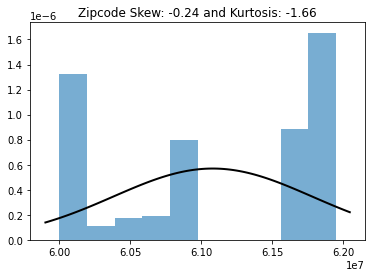

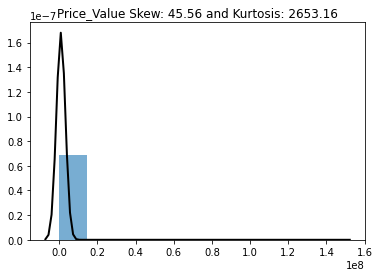

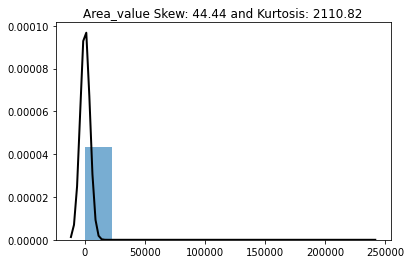

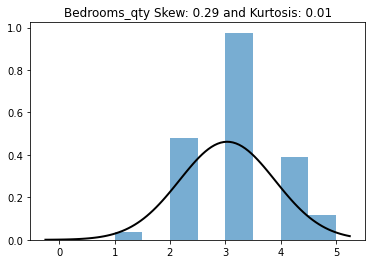

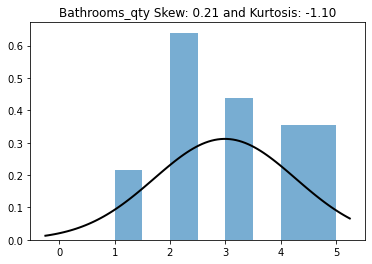

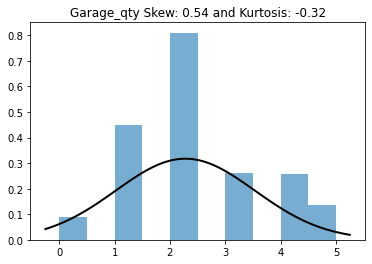

In [49]:
for item in numeric_columns:
    if ('c_' not in item) & ('p_' not in item):
        plot_hist_dist([item],df_Properties3)

<AxesSubplot:>

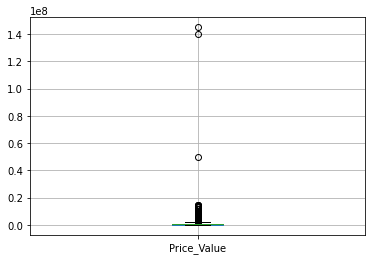

In [50]:
#Price Value and Area Value has high skew we need check it
df_Properties3.boxplot(column = 'Price_Value')

In [51]:
#We have too many outliers we need evaluate better the values
df_Properties3[['Price_Value','Area_value']].sort_values(by='Price_Value').head(30)

,Price_Value,Area_value
8838,35,1020
2750,80,3
2739,90,120
9350,185,68
2260,260,140
415,495,145
7717,1900,69
561,2300,40
46,8000,20
9221,10000,124


In [52]:
#For our study and for the porpose of my research, I am not looking for properties 
#less than 100k and also not over 2M so i will remove these lines
df_Properties3 = df_Properties3[(df_Properties3['Price_Value'] >= 100000) & (df_Properties3['Price_Value'] <= 2000000)]
#Let's look the high values now
df_Properties3.describe()

,Zipcode,c_Elevador,c_Portaria,c_Piscina,c_Portao_eletronico,c_Condominio_fechado,c_Segurança_24h,c_Permitido_animais,c_Area_murada,c_Academia,...,p_Armarios_na_cozinha,p_Academia,p_Area_de_servico,p_Mobiliado,p_Salao_de_festas,Price_Value,Area_value,Bedrooms_qty,Bathrooms_qty,Garage_qty
count,8.579000e+03,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,...,8579.000000,8579.000000,8579.000000,8579.000000,8579.000000,8.579000e+03,8579.000000,8579.000000,8579.000000,8579.000000
mean,6.107107e+07,0.271127,0.175428,0.471500,0.097797,0.432102,0.064693,0.333838,0.026110,0.241170,...,0.078098,0.170882,0.360065,0.145005,0.004080,5.968433e+05,243.217275,2.972141,2.902553,2.165404
std,6.946442e+05,0.444568,0.380355,0.499216,0.297057,0.495397,0.245997,0.471610,0.159473,0.427818,...,0.268341,0.376428,0.480047,0.352127,0.063746,4.319264e+05,4214.918027,0.797842,1.209108,1.151716
min,6.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000
25%,6.019234e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+05,73.000000,2.000000,2.000000,1.000000
50%,6.087301e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000e+05,104.000000,3.000000,3.000000,2.000000
75%,6.176000e+07,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,7.900000e+05,155.000000,3.000000,4.000000,3.000000
max,6.194922e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+06,230040.000000,5.000000,5.000000,5.000000


In [53]:
#Let's look now the area_value
df_Properties3[['Price_Value','Area_value']].sort_values(by='Area_value').head(30)

,Price_Value,Area_value
6432,569180,0
6227,315000,0
4726,250000,0
423,230000,0
2144,649000,0
7621,245000,0
5710,1300000,5
3649,230000,10
2585,175000,10
1643,500000,10


In [54]:
#For our study and for the porpose of my research, I am not looking for properties 
#with area less than 30 square meters also not looking for anything bigger than 1000 square meters 
df_Properties3 = df_Properties3[(df_Properties3['Area_value'] >= 30)& (df_Properties3['Area_value'] <= 1000)]
df_Properties3.describe()

,Zipcode,c_Elevador,c_Portaria,c_Piscina,c_Portao_eletronico,c_Condominio_fechado,c_Segurança_24h,c_Permitido_animais,c_Area_murada,c_Academia,...,p_Armarios_na_cozinha,p_Academia,p_Area_de_servico,p_Mobiliado,p_Salao_de_festas,Price_Value,Area_value,Bedrooms_qty,Bathrooms_qty,Garage_qty
count,8.504000e+03,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,...,8504.000000,8504.000000,8504.000000,8504.000000,8504.000000,8.504000e+03,8504.000000,8504.000000,8504.000000,8504.000000
mean,6.107060e+07,0.272695,0.176388,0.471660,0.097484,0.434266,0.064558,0.335136,0.025400,0.242357,...,0.077611,0.171684,0.361359,0.145343,0.004116,5.964226e+05,130.845484,2.970132,2.903457,2.168274
std,6.949405e+05,0.445372,0.381172,0.499226,0.296633,0.495689,0.245759,0.472066,0.157345,0.428534,...,0.267573,0.377128,0.480423,0.352467,0.064025,4.303405e+05,92.647361,0.791316,1.206325,1.142046
min,6.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,30.000000,0.000000,0.000000,0.000000
25%,6.019233e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+05,73.000000,2.000000,2.000000,1.000000
50%,6.087301e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.630000e+05,104.000000,3.000000,3.000000,2.000000
75%,6.176000e+07,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,7.900000e+05,154.000000,3.000000,4.000000,3.000000
max,6.194922e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+06,1000.000000,5.000000,5.000000,5.000000


In [55]:
#Let's work now to remove the outliers
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        print('Lines removed: {}'.format(df.shape[0]-df[(df[col] <= mean+(n_std*sd))].shape[0]))
        df = df[(df[col] <= mean+(n_std*sd))]
    return df

In [56]:
df_Properties3 = remove_outliers(df_Properties3,['Price_Value','Area_value'],3)
df_Properties3.describe()

Working on column: Price_Value
Lines removed: 120
Working on column: Area_value
Lines removed: 158


,Zipcode,c_Elevador,c_Portaria,c_Piscina,c_Portao_eletronico,c_Condominio_fechado,c_Segurança_24h,c_Permitido_animais,c_Area_murada,c_Academia,...,p_Armarios_na_cozinha,p_Academia,p_Area_de_servico,p_Mobiliado,p_Salao_de_festas,Price_Value,Area_value,Bedrooms_qty,Bathrooms_qty,Garage_qty
count,8.226000e+03,8226.000000,8226.000000,8226.000000,8226.000000,8226.000000,8226.000000,8226.000000,8226.000000,8226.000000,...,8226.000000,8226.000000,8226.000000,8226.000000,8226.000000,8.226000e+03,8226.000000,8226.000000,8226.000000,8226.000000
mean,6.106786e+07,0.277656,0.180404,0.467785,0.095551,0.438366,0.065038,0.335643,0.024435,0.242767,...,0.075614,0.174812,0.360564,0.142475,0.004255,5.688886e+05,120.444688,2.932896,2.855945,2.113664
std,6.953214e+05,0.447870,0.384547,0.498991,0.293992,0.496217,0.246607,0.472243,0.154404,0.428781,...,0.264395,0.379829,0.480193,0.349558,0.065094,3.967541e+05,65.822016,0.759696,1.182049,1.091705
min,6.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05,30.000000,1.000000,0.000000,0.000000
25%,6.019231e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.582500e+05,72.000000,2.000000,2.000000,1.000000
50%,6.087160e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+05,101.000000,3.000000,3.000000,2.000000
75%,6.176000e+07,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,7.500000e+05,149.000000,3.000000,4.000000,3.000000
max,6.194922e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.885654e+06,391.000000,5.000000,5.000000,5.000000


<AxesSubplot:>

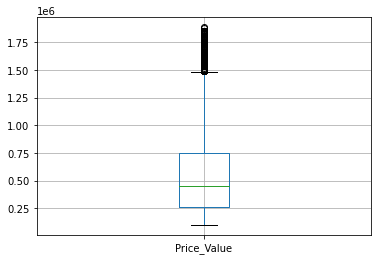

In [57]:
df_Properties3.boxplot(column = 'Price_Value')

<AxesSubplot:>

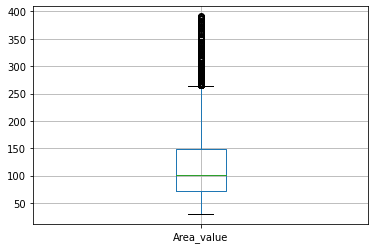

In [58]:
df_Properties3.boxplot(column = 'Area_value')

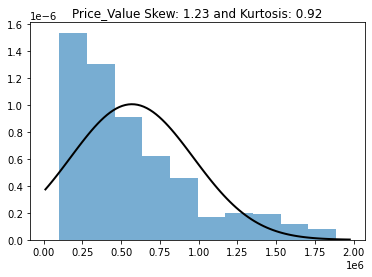

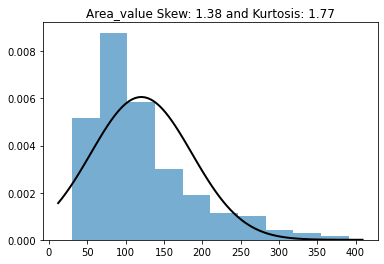

In [59]:
plot_hist_dist(['Price_Value','Area_value'],df_Properties3)

In [60]:
df_Properties3.to_csv("./Resources/data_cleanned.csv",index=False)